___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np

In [75]:
import sklearn

from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, make_scorer
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [76]:
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc, plot_precision_recall

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.rcParams["figure.figsize"] = (8,5)
pd.set_option('display.max_rows', 500)
# pd.set_option('display.float_format', '{:.3f}'.format)
pd.options.display.float_format = '{:.3f}'.format

In [6]:
print(f"pandas = {pd.__version__}\n"
      f"numpy = {np.__version__}\n"
       f"scikit-learn = {sklearn.__version__}")

pandas = 2.1.1
numpy = 1.26.1
scikit-learn = 1.3.1


In [7]:
import chardet

In [8]:
# determine the file type and read
def file_read(file):
    with open(file, 'rb') as f:
        encoding = chardet.detect(f.read())
    
    return pd.read_csv(file, delimiter=',', encoding=encoding['encoding'])


# show dataframe information
def information(df):
    print(f"RangeIndex: {df.shape[0]} entries, {df.index.min()} to {df.index.max()}")
    print(f"Total column: {df.shape[1]}\n")
    print(f"column{'':<30}type{'':<10}null %{'':<7}nunique %")

    print("-"*80)
    for column in sorted(df.columns):
        print(f"{column:<35} {str(df[column].dtype):<10}", end="")        
        
        tnull = "(%"+str(round(df[column].isnull().sum()/df.shape[0], 2)) +")"
        print(f"{df[column].isnull().sum():>4} {tnull:<10}", end="")

        print(f"{df[column].nunique():>4} (%{df[column].nunique()/df.shape[0]:.3f})")  


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [9]:
df_female = file_read('ANSUR II FEMALE Public.csv')

In [10]:
df_male = file_read('ANSUR II MALE Public.csv')

## Explore Data

In [11]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [12]:
information(df_female)

RangeIndex: 1986 entries, 0 to 1985
Total column: 108

column                              type          null %       nunique %
--------------------------------------------------------------------------------
Age                                 int64        0 (%0.0)      41 (%0.021)
Branch                              object       0 (%0.0)       3 (%0.002)
Component                           object       0 (%0.0)       3 (%0.002)
DODRace                             int64        0 (%0.0)       6 (%0.003)
Date                                object       0 (%0.0)     127 (%0.064)
Ethnicity                           object    1467 (%0.74)    112 (%0.056)
Gender                              object       0 (%0.0)       1 (%0.001)
Heightin                            int64        0 (%0.0)      21 (%0.011)
Installation                        object       0 (%0.0)      11 (%0.006)
PrimaryMOS                          object       0 (%0.0)     181 (%0.091)
SubjectId                           int64

In [13]:
df_female.columns = df_female.columns.str.lower()

In [14]:
information(df_male)

RangeIndex: 4082 entries, 0 to 4081
Total column: 108

column                              type          null %       nunique %
--------------------------------------------------------------------------------
Age                                 int64        0 (%0.0)      42 (%0.010)
Branch                              object       0 (%0.0)       3 (%0.001)
Component                           object       0 (%0.0)       3 (%0.001)
DODRace                             int64        0 (%0.0)       7 (%0.002)
Date                                object       0 (%0.0)     185 (%0.045)
Ethnicity                           object    3180 (%0.78)    159 (%0.039)
Gender                              object       0 (%0.0)       1 (%0.000)
Heightin                            int64        0 (%0.0)      25 (%0.006)
Installation                        object       0 (%0.0)      11 (%0.003)
PrimaryMOS                          object       0 (%0.0)     229 (%0.056)
SubjectNumericRace                  int64

In [15]:
df_male.columns = df_male.columns.str.lower()

In [16]:
df = pd.concat([df_female, df_male],ignore_index=True)
df0 = df.copy()
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,branch,primarymos,subjectsbirthlocation,subjectnumericrace,ethnicity,dodrace,age,heightin,weightlbs,writingpreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [17]:
df.duplicated().sum()

0

In [18]:
information(df)

RangeIndex: 6068 entries, 0 to 6067
Total column: 108

column                              type          null %       nunique %
--------------------------------------------------------------------------------
abdominalextensiondepthsitting      int64        0 (%0.0)     218 (%0.036)
acromialheight                      int64        0 (%0.0)     432 (%0.071)
acromionradialelength               int64        0 (%0.0)     133 (%0.022)
age                                 int64        0 (%0.0)      42 (%0.007)
anklecircumference                  int64        0 (%0.0)     112 (%0.018)
axillaheight                        int64        0 (%0.0)     402 (%0.066)
balloffootcircumference             int64        0 (%0.0)     107 (%0.018)
balloffootlength                    int64        0 (%0.0)      86 (%0.014)
biacromialbreadth                   int64        0 (%0.0)     169 (%0.028)
bicepscircumferenceflexed           int64        0 (%0.0)     237 (%0.039)
bicristalbreadth                    int64

In [19]:
unique_ethnicities = {k:v for k,v in sorted(df.ethnicity.value_counts().items()) if isinstance(k, str)}

for k,v in unique_ethnicities.items():
    percentage = v / df.ethnicity.notnull().sum()
    print(f"{k:<50}:{v:>3} (%{percentage:.3f})")

Aboriginal Guyanese                               :  1 (%0.001)
Algonquin Navajo Penobscot                        :  1 (%0.001)
Apache                                            :  2 (%0.001)
Apache Blackfoot                                  :  2 (%0.001)
Apache Blackfoot Cherokee Crow                    :  1 (%0.001)
Apache Cherokee                                   :  5 (%0.004)
Apache Kiowa Mexican                              :  1 (%0.001)
Apache Mexican                                    :  1 (%0.001)
Arab or Middle Eastern                            : 17 (%0.012)
Arab or Middle Eastern Caribbean Islander Cherokee:  1 (%0.001)
Arab or Middle Eastern Cuban                      :  1 (%0.001)
Arab or Middle Eastern Honduran                   :  1 (%0.001)
Arab or Middle Eastern Venezuelan                 :  1 (%0.001)
Argentine                                         :  1 (%0.001)
Argentine Brazilian                               :  1 (%0.001)
Argentine Mexican                       

In [20]:
df.groupby('gender').dodrace.value_counts()

gender  dodrace
Female  1           975
        2           656
        3           239
        4            71
        6            25
        5            20
Male    1          2817
        2           642
        3           440
        4           117
        6            34
        5            29
        8             3
Name: count, dtype: int64

In [21]:
df.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [22]:
for k, v in df.subjectsbirthlocation.value_counts().items():
    print(f"{k:<25}: {v:<5}  ({v/df.shape[0]:.2f})")

California               : 446    (0.07)
New York                 : 420    (0.07)
Texas                    : 397    (0.07)
Indiana                  : 266    (0.04)
Oklahoma                 : 221    (0.04)
Illinois                 : 216    (0.04)
Florida                  : 210    (0.03)
Minnesota                : 200    (0.03)
Michigan                 : 196    (0.03)
Mississippi              : 194    (0.03)
Georgia                  : 170    (0.03)
Alabama                  : 164    (0.03)
South Carolina           : 161    (0.03)
North Carolina           : 149    (0.02)
Ohio                     : 142    (0.02)
Louisiana                : 137    (0.02)
Pennsylvania             : 132    (0.02)
Virginia                 : 118    (0.02)
Massachusetts            : 112    (0.02)
Wisconsin                : 102    (0.02)
Germany                  : 92     (0.02)
New Jersey               : 89     (0.01)
Puerto Rico              : 88     (0.01)
Missouri                 : 84     (0.01)
Arizona         

In [23]:
state = "Alabama, Alaska, American Samoa, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, \
Georgia, Guam, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, \
Minor Outlying Islands, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, \
North Dakota, Northern Mariana Islands, Ohio, Oklahoma, Oregon, Pennsylvania, Puerto Rico, Rhode Island, South Carolina, South Dakota, Tennessee, \
Texas, U.S. Virgin Islands, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming".split(",")
states = [i.strip() for i in state]

USA = 0
country = {}
for k,v in sorted(df.subjectsbirthlocation.value_counts().items()):
    if k in states:
        USA +=v    
    else:
       country[k] = v

country["USA"] = USA

In [24]:
for k,v in sorted(country.items()):
    print(f"{k:<25}: {v:<5} ({round(v/df.shape[0], 2)}%)") 

Antigua and Barbuda      : 2     (0.0%)
Argentina                : 1     (0.0%)
Azerbaijan               : 1     (0.0%)
Bahamas                  : 1     (0.0%)
Bangladesh               : 1     (0.0%)
Barbados                 : 5     (0.0%)
Belarus                  : 1     (0.0%)
Belgium                  : 3     (0.0%)
Belize                   : 2     (0.0%)
Bermuda                  : 1     (0.0%)
Bolivia                  : 2     (0.0%)
Bosnia and Herzegovina   : 1     (0.0%)
Brazil                   : 1     (0.0%)
British Virgin Islands   : 1     (0.0%)
Bulgaria                 : 1     (0.0%)
Burma                    : 2     (0.0%)
Cambodia                 : 1     (0.0%)
Cameroon                 : 2     (0.0%)
Canada                   : 9     (0.0%)
Cape Verde               : 1     (0.0%)
Chile                    : 1     (0.0%)
China                    : 8     (0.0%)
Colombia                 : 13    (0.0%)
Costa Rica               : 2     (0.0%)
Cuba                     : 4     (0.0%)


In [25]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [26]:
clear_column = []
for i in range(len(df.columns)):
    if df[df.columns[i]].dtype == 'int64':
        for r in range(i+1, len(df.columns)):
            if df[df.columns[r]].dtype == 'int64':
                relation =df[df.columns[i]].corr(df[df.columns[r]])
                if relation>0.90:
                    clear_column.append(r)

In [27]:
df1 =df.drop(df.columns[list(set(clear_column))], axis = 1)

In [28]:
df1.drop(columns = ['date', 'installation', 'component', 'branch', 'primarymos', 'subjectsbirthlocation', 'subjectnumericrace', 'ethnicity', 'writingpreference'], axis = 1, inplace = True)

In [29]:
df1.dodrace.value_counts()

dodrace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [30]:
value_counts = df1['dodrace'].value_counts()

df1 = df1[df1['dodrace'].isin(value_counts[value_counts >= 500].index)]

In [31]:
df1['dodrace'] = df1['dodrace'].map({1:'White', 2: 'Black', 3: 'Hispanic'})

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5769 entries, 0 to 6067
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   subjectid                       5769 non-null   int64 
 1   abdominalextensiondepthsitting  5769 non-null   int64 
 2   acromialheight                  5769 non-null   int64 
 3   acromionradialelength           5769 non-null   int64 
 4   anklecircumference              5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   int64

In [33]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,5769.000,20742.730,13422.166,10027.000,14829.000,20035.000,27229.000,920103.000
abdominalextensiondepthsitting,5769.000,247.254,37.458,155.000,220.000,243.000,272.000,451.000
acromialheight,5769.000,1408.630,78.303,1146.000,1353.000,1412.000,1464.000,1683.000
acromionradialelength,5769.000,328.072,20.445,249.000,314.000,328.000,342.000,393.000
anklecircumference,5769.000,225.202,15.966,156.000,214.000,225.000,235.000,293.000
balloffootcircumference,5769.000,244.408,16.804,186.000,233.000,245.000,256.000,306.000
balloffootlength,5769.000,195.119,13.379,151.000,186.000,196.000,205.000,245.000
biacromialbreadth,5769.000,399.706,30.124,283.000,377.000,404.000,422.000,489.000
bicepscircumferenceflexed,5769.000,341.663,41.271,216.000,312.000,342.000,370.000,490.000
bicristalbreadth,5769.000,274.903,19.240,197.000,262.000,274.000,288.000,362.000


# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [34]:
X = df1.drop(columns = ['dodrace'])
y = df1['dodrace']

In [35]:
random_state = 101

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify = y)

In [37]:
X_train.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,gender,age
3895,16883,247,1356,311,250,249,191,400,351,264,...,855,177,741,130,1675,438,317,391,Male,24
1412,25933,233,1256,302,232,228,180,329,369,269,...,771,186,723,129,1578,410,306,364,Female,42
100,13147,224,1340,296,220,238,183,354,307,259,...,790,178,742,117,1601,429,293,399,Female,30
3779,16427,251,1461,344,235,247,209,429,342,293,...,925,193,830,146,1601,458,339,367,Male,31
1343,25791,180,1285,311,210,224,185,370,250,258,...,795,140,714,116,1413,414,262,325,Female,18


In [38]:
 X_test.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,sleevelengthspinewrist,thighclearance,thumbtipreach,tragiontopofhead,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistfrontlengthsitting,gender,age
3807,16491,234,1500,340,230,273,221,416,325,274,...,935,180,852,114,1678,483,317,420,Male,28
2914,14067,256,1427,328,237,237,200,441,360,278,...,882,189,817,127,1685,485,338,382,Male,21
3841,16735,250,1396,342,227,244,200,425,347,268,...,915,182,826,128,1636,470,349,355,Male,39
3241,14859,222,1464,350,211,263,203,413,333,264,...,890,155,856,134,1534,439,299,352,Male,51
3564,15484,253,1476,341,218,252,204,442,360,271,...,917,192,828,142,1694,445,343,430,Male,31


In [39]:
y_train.head()

3895       White
1412       Black
100     Hispanic
3779       White
1343       White
Name: dodrace, dtype: object

In [40]:
y_test.head()

3807    Hispanic
2914       White
3841       White
3241       White
3564       White
Name: dodrace, dtype: object

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [41]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Logistic model

In [42]:
X_train.select_dtypes("object").columns

Index(['gender'], dtype='object')

In [43]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",sparse=False), ['gender']),
                                       remainder=MinMaxScaler(), 
                                       verbose_feature_names_out=False) 


column_trans2 = make_column_transformer((OneHotEncoder(handle_unknown="ignore",sparse=False), ['gender']),
                                       remainder='passthrough', 
                                       verbose_feature_names_out=False)

In [44]:
operations_logistic_s = [("OneHotEncoder", column_trans), 
              ("logistic_scaled", 
               LogisticRegression(random_state=random_state, 
                                  class_weight = 'balanced'))]
logistic_scaled_model = Pipeline(steps=operations_logistic_s)

In [45]:
operations_logistic = [("OneHotEncoder", column_trans2), 
              ("logistic", 
               LogisticRegression(random_state=random_state, 
                                              class_weight = 'balanced'))]
logistic_model = Pipeline(steps=operations_logistic)

### Vanilla Logistic Model

In [46]:
logistic_scaled_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('logistic_scaled',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [47]:
eval_metric(logistic_scaled_model, X_train, y_train, X_test, y_test)

Test_Set
[[351  33   5]
 [ 27 123  54]
 [ 31 210 897]]
              precision    recall  f1-score   support

       Black       0.86      0.90      0.88       389
    Hispanic       0.34      0.60      0.43       204
       White       0.94      0.79      0.86      1138

    accuracy                           0.79      1731
   macro avg       0.71      0.76      0.72      1731
weighted avg       0.85      0.79      0.81      1731


Train_Set
[[ 817   56   36]
 [  45  337   93]
 [  75  497 2082]]
              precision    recall  f1-score   support

       Black       0.87      0.90      0.89       909
    Hispanic       0.38      0.71      0.49       475
       White       0.94      0.78      0.86      2654

    accuracy                           0.80      4038
   macro avg       0.73      0.80      0.74      4038
weighted avg       0.86      0.80      0.82      4038



In [48]:
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [49]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[325  38  26]
 [ 36 106  62]
 [ 94 235 809]]
              precision    recall  f1-score   support

       Black       0.71      0.84      0.77       389
    Hispanic       0.28      0.52      0.36       204
       White       0.90      0.71      0.80      1138

    accuracy                           0.72      1731
   macro avg       0.63      0.69      0.64      1731
weighted avg       0.79      0.72      0.74      1731


Train_Set
[[ 766   72   71]
 [  77  245  153]
 [ 257  492 1905]]
              precision    recall  f1-score   support

       Black       0.70      0.84      0.76       909
    Hispanic       0.30      0.52      0.38       475
       White       0.89      0.72      0.80      2654

    accuracy                           0.72      4038
   macro avg       0.63      0.69      0.65      4038
weighted avg       0.78      0.72      0.74      4038



In [50]:
model = Pipeline(steps=operations_logistic_s)

scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels = ["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}


scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.358
train_precision_Hispanic   0.382
test_recall_Hispanic       0.671
train_recall_Hispanic      0.708
test_f1_Hispanic           0.466
train_f1_Hispanic          0.496
dtype: float64

### Logistic Model GridsearchCV

In [51]:
param_grid = {
    'logistic_scaled__C': [.001, 0.1, 1, 2],
    'logistic_scaled__penalty': ['l1', 'l2'],
    'logistic_scaled__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

}

In [52]:
model = Pipeline(steps=operations_logistic_s) 

logistic_scaled_gs = GridSearchCV(estimator = model,
                              param_grid=param_grid,
                              scoring=scoring,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True,
                              refit='f1_Hispanic')

In [53]:
logistic_scaled_gs.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['gender'])],
                                                          verbose_feature_names_out=False)),
                                       ('logistic_scaled',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic_...
                         'logistic_scaled__solver': ['liblinear', 'newton-cg',
                                                     'lbfgs', 'sag', 'saga']},
             refit='f1_Hispanic', return_train_score=True,
             scoring={'f1_Hispanic': make_scorer(f1_score, average=None, labels=['Hispanic']),
                      'precision_Hispanic': make_scorer(precision_score, average=None, labels=['Hispanic']),
                      'recall_Hispanic': make_scorer(recall_score, average=None, labels=['Hispanic'])})

In [54]:
logistic_scaled_gs.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('logistic_scaled',
                 LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [55]:
eval_metric(logistic_scaled_gs, X_train, y_train, X_test, y_test)

Test_Set
[[ 354   20   15]
 [  32   88   84]
 [  37   69 1032]]
              precision    recall  f1-score   support

       Black       0.84      0.91      0.87       389
    Hispanic       0.50      0.43      0.46       204
       White       0.91      0.91      0.91      1138

    accuracy                           0.85      1731
   macro avg       0.75      0.75      0.75      1731
weighted avg       0.85      0.85      0.85      1731


Train_Set
[[ 833   21   55]
 [  56  236  183]
 [  62  160 2432]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       909
    Hispanic       0.57      0.50      0.53       475
       White       0.91      0.92      0.91      2654

    accuracy                           0.87      4038
   macro avg       0.78      0.78      0.78      4038
weighted avg       0.86      0.87      0.86      4038



In [56]:
operations_logistic_s2 = [("OneHotEncoder", column_trans), 
              ("logistic_scaled", 
               LogisticRegression(random_state=random_state, 
                                  class_weight = 'balanced', 
                                  C=1, 
                                  solver='liblinear', 
                                  penalty='l1'))]

model = Pipeline(steps=operations_logistic_s2)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.545
train_precision_Hispanic   0.568
test_recall_Hispanic       0.469
train_recall_Hispanic      0.495
test_f1_Hispanic           0.501
train_f1_Hispanic          0.529
dtype: float64

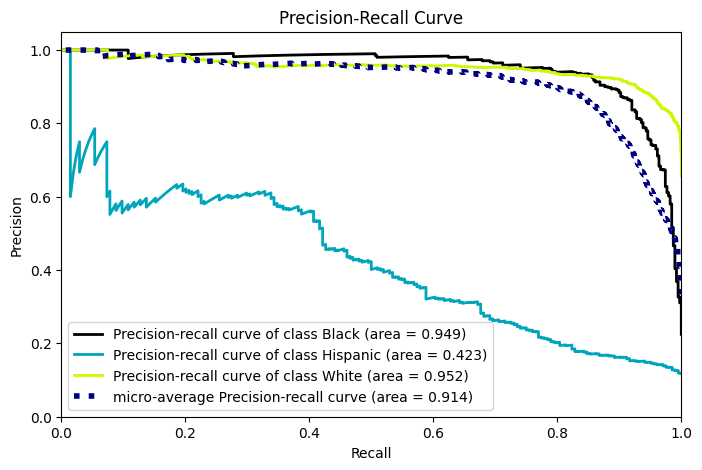

In [57]:
model = Pipeline(steps=operations_logistic_s2)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 2. SVC

### Vanilla SVC model

In [58]:
operations_svm_s = [("OneHotEncoder", column_trans), 
              ("svc_scaled", 
               SVC(random_state=random_state, 
                   class_weight = 'balanced'))]

svm_scaled_model = Pipeline(steps=operations_svm_s)

In [60]:
operations_svm = [("OneHotEncoder", column_trans2), 
              ("svc", 
               SVC(random_state=random_state, 
                   class_weight = 'balanced'))]

svm_model = Pipeline(steps=operations_svm)

In [61]:
svm_scaled_model.fit(X_train, y_train)

eval_metric(svm_scaled_model, X_train, y_train, X_test, y_test)

Test_Set
[[355  29   5]
 [ 29 117  58]
 [ 40 196 902]]
              precision    recall  f1-score   support

       Black       0.84      0.91      0.87       389
    Hispanic       0.34      0.57      0.43       204
       White       0.93      0.79      0.86      1138

    accuracy                           0.79      1731
   macro avg       0.70      0.76      0.72      1731
weighted avg       0.84      0.79      0.81      1731


Train_Set
[[ 853   29   27]
 [  32  375   68]
 [  64  403 2187]]
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92       909
    Hispanic       0.46      0.79      0.59       475
       White       0.96      0.82      0.89      2654

    accuracy                           0.85      4038
   macro avg       0.77      0.85      0.80      4038
weighted avg       0.89      0.85      0.86      4038



In [62]:
svm_model.fit(X_train, y_train)

eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[264  82  43]
 [122  54  28]
 [625 361 152]]
              precision    recall  f1-score   support

       Black       0.26      0.68      0.38       389
    Hispanic       0.11      0.26      0.15       204
       White       0.68      0.13      0.22      1138

    accuracy                           0.27      1731
   macro avg       0.35      0.36      0.25      1731
weighted avg       0.52      0.27      0.25      1731


Train_Set
[[ 631  199   79]
 [ 281  130   64]
 [1450  841  363]]
              precision    recall  f1-score   support

       Black       0.27      0.69      0.39       909
    Hispanic       0.11      0.27      0.16       475
       White       0.72      0.14      0.23      2654

    accuracy                           0.28      4038
   macro avg       0.37      0.37      0.26      4038
weighted avg       0.54      0.28      0.26      4038



In [63]:
model = Pipeline(steps=operations_svm_s)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.372
train_precision_Hispanic   0.469
test_recall_Hispanic       0.621
train_recall_Hispanic      0.796
test_f1_Hispanic           0.464
train_f1_Hispanic          0.591
dtype: float64

###  SVC Model GridsearchCV

In [64]:
param_grid = {
    'svc_scaled__C': [0.1, 1, 10],
    'svc_scaled__gamma': [0.1, 1, 10],
    'svc_scaled__kernel':['linear', 'rbf']
}

In [65]:
model = Pipeline(steps=operations_svm_s)

svc_scaled_gs = GridSearchCV(estimator = model,
                              param_grid=param_grid,
                              scoring=scoring,
                              cv=10,
                              n_jobs=-1,
                              return_train_score=True,
                              refit='f1_Hispanic'
                             )

In [66]:
svc_scaled_gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['gender'])],
                                                          verbose_feature_names_out=False)),
                                       ('svc_scaled',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc_scaled__C': [0.1, 1, 10],
                         'svc_scaled__gamma': [0.1, 1, 10],
                         'svc_scaled__kernel': ['linear', 'rbf']},
             refit='f1_Hispanic', return_train_score=True,
             scoring={'f1_Hispanic': make_scorer(f1_score, average=None, labels=['Hispanic']),
                      'precision_Hispanic': make_scorer(precision_score, average=None, labels=['Hispanic']),
                      'recall_Hispanic': make_scorer(recall_score, average=None, labels=['Hispanic'])})

In [67]:
svc_scaled_gs.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender'])],
                                   verbose_feature_names_out=False)),
                ('svc_scaled',
                 SVC(C=1, class_weight='balanced', gamma=0.1, kernel='linear',
                     random_state=101))])

In [68]:
eval_metric(svc_scaled_gs, X_train, y_train, X_test, y_test)

Test_Set
[[353  31   5]
 [ 26 124  54]
 [ 38 215 885]]
              precision    recall  f1-score   support

       Black       0.85      0.91      0.88       389
    Hispanic       0.34      0.61      0.43       204
       White       0.94      0.78      0.85      1138

    accuracy                           0.79      1731
   macro avg       0.71      0.76      0.72      1731
weighted avg       0.85      0.79      0.81      1731


Train_Set
[[ 819   60   30]
 [  46  335   94]
 [  82  474 2098]]
              precision    recall  f1-score   support

       Black       0.86      0.90      0.88       909
    Hispanic       0.39      0.71      0.50       475
       White       0.94      0.79      0.86      2654

    accuracy                           0.81      4038
   macro avg       0.73      0.80      0.75      4038
weighted avg       0.86      0.81      0.82      4038



In [69]:
operations_svm_s2 = [("OneHotEncoder", column_trans), 
              ("svc_scaled", SVC(random_state=random_state, 
                                 class_weight = 'balanced', 
                                 C=1, 
                                 gamma=0.1,
                                 kernel = 'linear' ))]

model = Pipeline(steps=operations_svm_s2)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.367
train_precision_Hispanic   0.388
test_recall_Hispanic       0.678
train_recall_Hispanic      0.712
test_f1_Hispanic           0.476
train_f1_Hispanic          0.502
dtype: float64

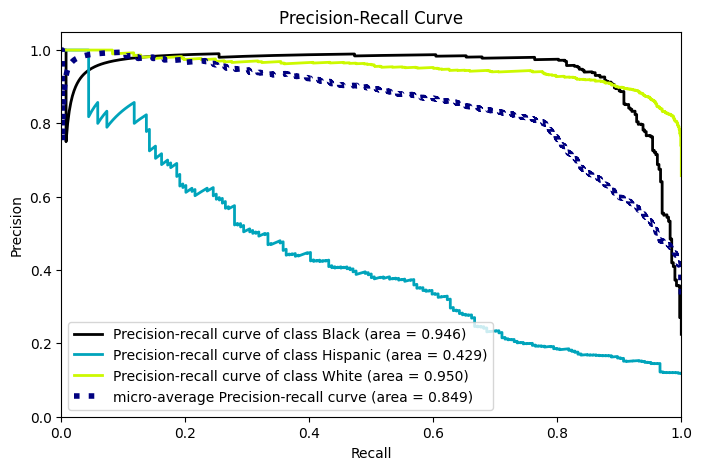

In [71]:
model = Pipeline(steps=operations_svm_s2)
model.fit(X_train, y_train)
decision_function = model.decision_function(X_test)
plot_precision_recall(y_test, decision_function)
plt.show();

In [77]:
PrecisionRecallDisplay.from_estimator(svc_scaled_gs, X_test, y_test);

ValueError: Expected 'estimator' to be a binary classifier. Got 3 classes instead.

## 3. RF

In [78]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans3 = make_column_transformer((ord_enc, ['gender']), remainder='passthrough')

### Vanilla RF Model

In [79]:
operations_rf = [("OrdinalEncoder", column_trans3), 
                 ("randomForest", 
                  RandomForestClassifier(class_weight="balanced", random_state=random_state))]

randomforest_model = Pipeline(steps=operations_rf)

In [80]:
randomforest_model.fit(X_train, y_train)

eval_metric(randomforest_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 283    1  105]
 [  12   14  178]
 [   8    4 1126]]
              precision    recall  f1-score   support

       Black       0.93      0.73      0.82       389
    Hispanic       0.74      0.07      0.13       204
       White       0.80      0.99      0.88      1138

    accuracy                           0.82      1731
   macro avg       0.82      0.60      0.61      1731
weighted avg       0.82      0.82      0.78      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00       909
    Hispanic       1.00      1.00      1.00       475
       White       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg       1.00      1.00      1.00      4038
weighted avg       1.00      1.00      1.00      4038



In [81]:
model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.630
train_precision_Hispanic   1.000
test_recall_Hispanic       0.032
train_recall_Hispanic      1.000
test_f1_Hispanic           0.059
train_f1_Hispanic          1.000
dtype: float64

### RF Model GridsearchCV

In [82]:
param_grid = {'randomForest__n_estimators':[200,300],
              'randomForest__criterion': ['gini', 'entropy'],
             'randomForest__max_depth':[2, 5, 10]}

In [83]:
model = Pipeline(steps=operations_rf) 

randomForest_gs = GridSearchCV(estimator = model,
                              param_grid=param_grid,
                              scoring=scoring,
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True,
                              refit='f1_Hispanic')

In [84]:
randomForest_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['gender'])])),
                                       ('randomForest',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'randomForest__criterion'...
                         'randomForest__max_depth': [2, 5, 10],
                         'randomForest__n_estimators': [200, 300]},
             refit='f1_Hispanic', return_train_score=True,
             scoring={'f1_Hispanic': make_scorer(f1_score, average=None, labels=['Hispanic']),
                      'precision_Hispanic': make_scorer(precision_score, average=None, labels=['Hispanic']),
                      'recall_Hispanic': make_scorer(recall_score, average=None, labels=['Hispanic'])})

In [87]:
randomForest_gs.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender'])])),
                ('randomForest',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=5,
                                        n_estimators=200, random_state=101))])

In [88]:
eval_metric(randomForest_gs, X_train, y_train, X_test, y_test)

Test_Set
[[339  22  28]
 [ 35 105  64]
 [ 82 267 789]]
              precision    recall  f1-score   support

       Black       0.74      0.87      0.80       389
    Hispanic       0.27      0.51      0.35       204
       White       0.90      0.69      0.78      1138

    accuracy                           0.71      1731
   macro avg       0.64      0.69      0.65      1731
weighted avg       0.79      0.71      0.74      1731


Train_Set
[[ 815   35   59]
 [  41  311  123]
 [ 202  555 1897]]
              precision    recall  f1-score   support

       Black       0.77      0.90      0.83       909
    Hispanic       0.35      0.65      0.45       475
       White       0.91      0.71      0.80      2654

    accuracy                           0.75      4038
   macro avg       0.68      0.76      0.69      4038
weighted avg       0.81      0.75      0.77      4038



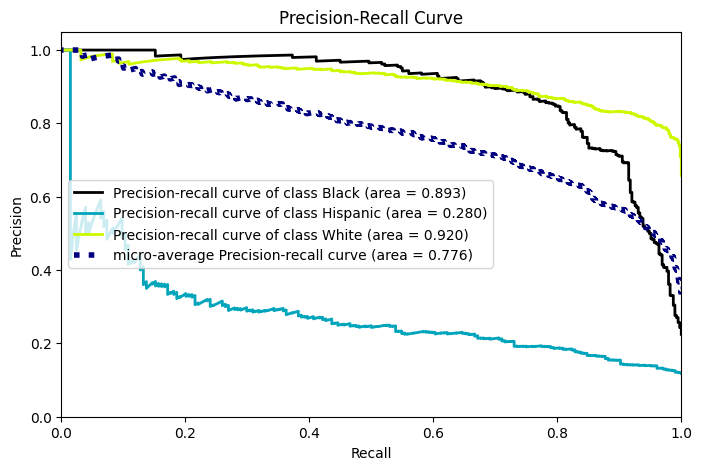

In [91]:
operations_rf2 = [("OrdinalEncoder", column_trans3), 
              ("randomForest", RandomForestClassifier(random_state=random_state, 
                                                      criterion='entropy',
                                                      class_weight = 'balanced', 
                                                      max_depth=5,
                                                      n_estimators=200))]
model = Pipeline(steps=operations_rf2)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

## 4. XGBoost

### Vanilla XGBoost Model

In [135]:
operations_xgb = [("OrdinalEncoder", column_trans3), 
                 ("xgb", 
                  XGBClassifier( class_weight="balanced",
                                random_state=random_state))]

xgb_model = Pipeline(steps=operations_xgb)

In [95]:
y_train_xgb = y_train.map({'Black':0, 'Hispanic': 1, 'White': 2 })
y_test_xgb = y_test.map({'Black':0, 'Hispanic': 1, 'White': 2 })

In [136]:
xgb_model.fit(X_train, y_train_xgb)

eval_metric(xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

[23:40:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Test_Set
[[ 330   12   47]
 [  25   44  135]
 [  19   30 1089]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       389
           1       0.51      0.22      0.30       204
           2       0.86      0.96      0.90      1138

    accuracy                           0.85      1731
   macro avg       0.75      0.67      0.69      1731
weighted avg       0.82      0.85      0.82      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       475
           2       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg   

In [137]:
xgb_model.fit(X_train, y_train_xgb, xgb__sample_weight = classes_weights)

eval_metric(xgb_model, X_train, y_train_xgb, X_test, y_test_xgb)

[23:41:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Test_Set
[[ 344   14   31]
 [  23   63  118]
 [  24   48 1066]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       389
           1       0.50      0.31      0.38       204
           2       0.88      0.94      0.91      1138

    accuracy                           0.85      1731
   macro avg       0.75      0.71      0.72      1731
weighted avg       0.83      0.85      0.84      1731


Train_Set
[[ 909    0    0]
 [   0  475    0]
 [   0    0 2654]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       909
           1       1.00      1.00      1.00       475
           2       1.00      1.00      1.00      2654

    accuracy                           1.00      4038
   macro avg   

In [139]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels = [1]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[1]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[1])}

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train_xgb, scoring = scoring_xgb, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[23:41:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[23:41:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[23:41:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[23:42:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

[23:42:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight" } are n

test_precision_Hispanic    0.620
train_precision_Hispanic   1.000
test_recall_Hispanic       0.206
train_recall_Hispanic      1.000
test_f1_Hispanic           0.307
train_f1_Hispanic          1.000
dtype: float64

### XGBoost Model GridsearchCV

In [140]:
param_grid = {'xgb__n_estimators':[20,30],              
             'xgb__max_depth':[2, 5],
             'xgb__learning_rate': [0.05, 0.02],
             'xgb__class_weight': ['balanced', None],
              'xgb__scale_pos_weight': [len(y_train_xgb[y_train_xgb == 0]) / len(y_train_xgb[y_train_xgb == 1])]
             }


In [141]:
model = Pipeline(steps=operations_xgb)

xgb_gs = GridSearchCV(estimator = model,
                              param_grid=param_grid,
                              scoring=scoring,
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True,
                              refit='f1_Hispanic'
                              )

In [ ]:
xgb_gs.fit(X_train,y_train_xgb)

In [117]:
xgb_gs.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               class_weight='balanced', colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               ear...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [118]:
xgb_gs.best_params_

{'xgb__class_weight': 'balanced',
 'xgb__learning_rate': 0.05,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 20,
 'xgb__scale_pos_weight': 1.9136842105263159}

In [120]:
eval_metric(xgb_gs, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[ 189    2  198]
 [  21    6  177]
 [  14    4 1120]]
              precision    recall  f1-score   support

           0       0.84      0.49      0.62       389
           1       0.50      0.03      0.06       204
           2       0.75      0.98      0.85      1138

    accuracy                           0.76      1731
   macro avg       0.70      0.50      0.51      1731
weighted avg       0.74      0.76      0.70      1731


Train_Set
[[ 434    8  467]
 [  43   20  412]
 [  48    4 2602]]
              precision    recall  f1-score   support

           0       0.83      0.48      0.61       909
           1       0.62      0.04      0.08       475
           2       0.75      0.98      0.85      2654

    accuracy                           0.76      4038
   macro avg       0.73      0.50      0.51      4038
weighted avg       0.75      0.76      0.70      4038



In [ ]:
operations_xgb2 = [("OrdinalEncoder", column_trans3), 
              ("xgb", XGBClassifier(random_state=random_state, 
                                    class_weight = 'balanced', 
                                    max_depth=2,
                                    n_estimators=20,  
                                    learning_rate:0.05))]
model = Pipeline(steps=operations_xgb2)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
model.feature_importances_

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___